# Spotify Popularity Predictor (39%)

The goal of this challenge is to create a model that predicts the popularity of a song based on its features.

The dataset contains a list of tracks with the following characteristics:
- `acousticness`: whether the track is acoustic
- `danceability`: describes how suitable a track is for dancing
- `duration_ms`: duration of the track in milliseconds
- `energy`: represents a perceptual measure of intensity and activity
- `explicit`: whether the track has explicit lyrics
- `id`: id for the track
- `instrumentalness`: predicts whether a track contains no vocals
- `key`: the key the track is in
- `liveness`: detects the presence of an audience in the recording
- `loudness`: the overall loudness of a track in decibels
- `mode`: modality of a track
- `name`: name of the track
- `popularity`: popularity of the track
- `release_date`: release date
- `speechiness`: detects the presence of spoken words in a track
- `tempo`: overall estimated tempo of a track in beats per minute
- `valence`: describes the musical positiveness conveyed by a track
- `artist`: artist who performed the track

# Model

## Data collection

**📝 Load the `spotify_popularity_train.csv` dataset from the provided URL. Display the first few rows. Perform the usual cleaning operations. Store the result in a `DataFrame` named `data`.**

👉 Do not forget to clean the dataset

In [1]:
url = "https://wagon-public-datasets.s3.amazonaws.com/certification_paris_2021Q1/spotify_popularity_train.csv"

In [2]:
import pandas as pd
data = pd.read_csv(url)
data.head(3)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.00409,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.14000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.00000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand


In [3]:
#import unidecode
#import string
#
#import re
#
#def remove_accents(words):
#    remove_accents = unidecode.unidecode(words)
#    return remove_accents
#
#def lowered_text(words):
#    lowercased = words.lower()
#    return lowercased
#
#def remove_alphas(words):
#    sentence = ''.join(c for c in words if c.isalpha() or c == ' ')
#    return re.sub(" +", " ", words)
#
#data = data.dropna()
#
#data['clean_name'] = data_2.name.apply(remove_accents)
#data['clean_name'] = data_2.clean_name.apply(lowered_text)
#data['clean_name'] = data_2.clean_name.apply(remove_alphas)
#
#data['clean_artist'] = data_2.artist.apply(remove_accents)
#data['clean_artist'] = data_2.clean_artist.apply(lowered_text)
#data['clean_artist'] = data_2.clean_artist.apply(remove_alphas)

data.head()

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.65400,0.499,219827,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.0898,-16.435,1,Back in the Goodle Days,40,1971,0.0454,149.460,0.4300,John Hartford
1,0.00592,0.439,483948,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.0890,-8.497,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.0677,138.040,0.0587,Driftmoon
2,0.73400,0.523,245693,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.0771,-11.506,1,I'm The Greatest Star,40,1968-09-01,0.2140,75.869,0.4640,Barbra Streisand
3,0.42900,0.681,130026,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.3940,-21.457,0,Kapitel 281 - Der Page und die Herzogin,1,1926,0.9460,145.333,0.2880,Georgette Heyer
4,0.56200,0.543,129813,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.1270,-7.374,1,Away from You,15,2008-02-11,0.0265,139.272,0.8010,Gerry & The Pacemakers


<AxesSubplot:>

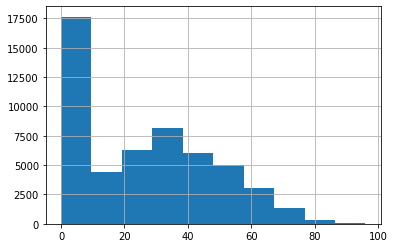

In [4]:
data['popularity'].hist()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data[['acousticness',
                 'danceability',
                 'duration_ms', 
                 'energy',
                 'instrumentalness',
                 'liveness',
                 'loudness',
                 'speechiness',
                 'tempo',
                 'valence'
                   ]])

data[['acousticness',
     'danceability',
     'duration_ms', 
     'energy',
     'instrumentalness',
     'liveness',
     'loudness',
     'speechiness',
     'tempo',
     'valence']] = scaler.transform(data[['acousticness',
                 'danceability',
                 'duration_ms', 
                 'energy',
                 'instrumentalness',
                 'liveness',
                 'loudness',
                 'speechiness',
                 'tempo',
                 'valence']])

data

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.656627,0.506085,0.044604,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.089890,0.683437,1,Back in the Goodle Days,40,1971,0.046804,0.613781,0.4300,John Hartford
1,0.005944,0.445233,0.099696,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.089089,0.807966,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.069794,0.566883,0.0587,Driftmoon
2,0.736948,0.530426,0.049999,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.077177,0.760762,1,I'm The Greatest Star,40,1968-09-01,0.220619,0.311568,0.4640,Barbra Streisand
3,0.430723,0.690669,0.025872,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.394394,0.604653,0,Kapitel 281 - Der Page und die Herzogin,1,1926,0.975258,0.596833,0.2880,Georgette Heyer
4,0.564257,0.550710,0.025828,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.127127,0.825584,1,Away from You,15,2008-02-11,0.027320,0.571942,0.8010,Gerry & The Pacemakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52312,0.164659,0.519270,0.010484,0.907,0,2GJxRwFe8oLcbXgTw9P5of,0.004870,6,0.801802,0.818838,1,"Incidental CB Dialogue - Bandit, Smokey & Snowman",25,1977-01-01,0.682474,0.351592,0.3150,Burt Reynolds
52313,0.776104,0.540568,0.038974,0.659,0,0EtAPdqg7TysBXKDbnzuSO,0.773000,2,0.113113,0.798240,0,Samba De Verão,43,1965-06-01,0.043918,0.650355,0.6140,Walter Wanderley
52314,0.457831,0.555781,0.063588,0.568,0,1s78GLrkZT7rTKAEu056M8,0.000000,6,0.089289,0.857367,1,Kekkonnouta,0,2020-04-15,0.028351,0.318245,0.3380,accel
52315,0.968876,0.365112,0.043908,0.132,0,1LUBU2WI4z0dALUM16hoAH,0.000000,10,0.126126,0.611603,1,Die Meistersinger von Nürnberg - Act 1: Wohl M...,0,1952-01-01,0.036598,0.332266,0.4100,Richard Wagner


### Save your results

Run the following cell to save your results.

In [6]:
from nbresult import ChallengeResult

ChallengeResult(
    "c5_data_cleaning",
    data=data).write()

## Baseline

**📝 We want to use a metric that measures the prediction error in the same unit than `popularity`. In addition, it should strongly penalize largest errors. Which sklearn's [metric](https://scikit-learn.org/stable/modules/model_evaluation.html) should we use? Store its exact name as string below**

In [7]:
scoring = "neg_mean_squared_error"

**📝 Let's build a baseline model using only the numerical features in our dataset.**
- Build `X_baseline` with only numerical features
- Build `y` your target containing the `popularity`
- Then 5 times cross validate the baseline linear model of your choice (do not fine tune it)
- Store your mean performance in a `float` variable named `baseline_score`

In [8]:
data

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,artist
0,0.656627,0.506085,0.044604,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.089890,0.683437,1,Back in the Goodle Days,40,1971,0.046804,0.613781,0.4300,John Hartford
1,0.005944,0.445233,0.099696,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.089089,0.807966,1,Worlds Which Break Us - Intro Mix,22,2015-02-02,0.069794,0.566883,0.0587,Driftmoon
2,0.736948,0.530426,0.049999,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.077177,0.760762,1,I'm The Greatest Star,40,1968-09-01,0.220619,0.311568,0.4640,Barbra Streisand
3,0.430723,0.690669,0.025872,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.394394,0.604653,0,Kapitel 281 - Der Page und die Herzogin,1,1926,0.975258,0.596833,0.2880,Georgette Heyer
4,0.564257,0.550710,0.025828,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.127127,0.825584,1,Away from You,15,2008-02-11,0.027320,0.571942,0.8010,Gerry & The Pacemakers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52312,0.164659,0.519270,0.010484,0.907,0,2GJxRwFe8oLcbXgTw9P5of,0.004870,6,0.801802,0.818838,1,"Incidental CB Dialogue - Bandit, Smokey & Snowman",25,1977-01-01,0.682474,0.351592,0.3150,Burt Reynolds
52313,0.776104,0.540568,0.038974,0.659,0,0EtAPdqg7TysBXKDbnzuSO,0.773000,2,0.113113,0.798240,0,Samba De Verão,43,1965-06-01,0.043918,0.650355,0.6140,Walter Wanderley
52314,0.457831,0.555781,0.063588,0.568,0,1s78GLrkZT7rTKAEu056M8,0.000000,6,0.089289,0.857367,1,Kekkonnouta,0,2020-04-15,0.028351,0.318245,0.3380,accel
52315,0.968876,0.365112,0.043908,0.132,0,1LUBU2WI4z0dALUM16hoAH,0.000000,10,0.126126,0.611603,1,Die Meistersinger von Nürnberg - Act 1: Wohl M...,0,1952-01-01,0.036598,0.332266,0.4100,Richard Wagner


In [9]:
X_baseline = data[['acousticness', 
                   'danceability', 
                   'duration_ms', 
                   'explicit',
                   'energy',
                   'instrumentalness', 
                   'liveness', 
                   'loudness',
                   'mode',
                   'speechiness',
                   'tempo',
                   'valence'
                  ]]
y= data[['popularity']]

In [10]:
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

In [11]:
baseline_model = DummyRegressor(strategy="median")
cv_results = cross_validate(baseline_model,X_baseline,y, cv=5, scoring=scoring)

In [12]:
baseline_score = cv_results['test_score'].mean()

In [13]:
baseline_score

-478.2835404615682

### Save your results

Run the following cell to save your results.

In [14]:
from nbresult import ChallengeResult

ChallengeResult(
    "baseline",
    scoring=scoring,
    baseline_score=baseline_score).write()

## Feature engineering

Let's now use the features that we left aside: `release_date` and `artist` to improve the performance of our model. We'll create them manually in a train vs. test context first (and pipeline them later)

### holdout
**📝 Create the 4 variables `X_train` `y_train`, `X_test`, `y_test` with a 50% split with random sampling**

In [15]:
from sklearn.model_selection import train_test_split

X = data.drop(columns=['name', 'id','popularity'])
y = data[['popularity']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
X_train, X_test, y_train, y_test

(       acousticness  danceability  duration_ms  energy  explicit  \
 34285      0.031727      0.715010     0.054738   0.721         0   
 17751      0.045482      0.810345     0.049368   0.506         0   
 48427      0.636546      0.534483     0.035253   0.164         0   
 50363      0.583333      0.220081     0.048686   0.258         0   
 29501      0.502008      0.577079     0.053656   0.579         0   
 ...             ...           ...          ...     ...       ...   
 39635      0.987952      0.330629     0.107753   0.248         0   
 2071       0.001426      0.525355     0.056329   0.763         0   
 52067      0.991968      0.363083     0.090312   0.214         0   
 18717      0.009277      0.444219     0.054466   0.665         0   
 51367      0.819277      0.694726     0.029844   0.436         0   
 
        instrumentalness  key  liveness  loudness  mode release_date  \
 34285          0.000000    4  0.248248  0.830149     1   2006-01-01   
 17751          0.001070  

In [16]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26158, 15), (26159, 15), (26158, 1), (26159, 1))

### year

**📝 Create `X_train_year` and `X_test_year` by adding the new column `year` containing the release year of the track as integer**

In [17]:
X_train_year = X_train
X_train_year['year'] = pd.to_datetime(X_train_year['release_date']).dt.year

X_test_year = X_test
X_test_year['year'] = pd.to_datetime(X_test_year['release_date']).dt.year

X_train_year, X_test_year

<ipython-input-17-85ab040af55d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_year['year'] = pd.to_datetime(X_train_year['release_date']).dt.year
<ipython-input-17-85ab040af55d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_year['year'] = pd.to_datetime(X_test_year['release_date']).dt.year


(       acousticness  danceability  duration_ms  energy  explicit  \
 34285      0.031727      0.715010     0.054738   0.721         0   
 17751      0.045482      0.810345     0.049368   0.506         0   
 48427      0.636546      0.534483     0.035253   0.164         0   
 50363      0.583333      0.220081     0.048686   0.258         0   
 29501      0.502008      0.577079     0.053656   0.579         0   
 ...             ...           ...          ...     ...       ...   
 39635      0.987952      0.330629     0.107753   0.248         0   
 2071       0.001426      0.525355     0.056329   0.763         0   
 52067      0.991968      0.363083     0.090312   0.214         0   
 18717      0.009277      0.444219     0.054466   0.665         0   
 51367      0.819277      0.694726     0.029844   0.436         0   
 
        instrumentalness  key  liveness  loudness  mode release_date  \
 34285          0.000000    4  0.248248  0.830149     1   2006-01-01   
 17751          0.001070  

### artist

How could we use the `artist` column? There are too many artists to one hot encode it.  
We could instead create an `artist_popularity` feature containing the mean popularity of an artist, computed as the mean popularity of all tracks the artist released _on the train set_.

#### Process artist popularity from the Training set

**📝 Compute and store the `artist_popularity` as a new pandas `Series`**  

In [18]:
df_train = pd.concat([X_train, y_train], axis=1)
df_train

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,artist,year,popularity
34285,0.031727,0.715010,0.054738,0.721,0,0.000000,4,0.248248,0.830149,1,2006-01-01,0.195876,0.656983,0.8190,High School Musical Cast,2006,58
17751,0.045482,0.810345,0.049368,0.506,0,0.001070,2,0.036537,0.793581,1,1980-10-03,0.062474,0.576201,0.5180,The Police,1980,69
48427,0.636546,0.534483,0.035253,0.164,0,0.007460,0,0.594595,0.649661,0,1962,0.037835,0.622278,0.2240,Gil Evans,1962,18
50363,0.583333,0.220081,0.048686,0.258,0,0.000016,0,0.111111,0.740148,1,1969-03,0.037216,0.531422,0.0662,Frank Sinatra,1969,35
29501,0.502008,0.577079,0.053656,0.579,0,0.000028,1,0.109109,0.768888,1,1994-11-01,0.073814,0.447618,0.4070,Nirvana,1994,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39635,0.987952,0.330629,0.107753,0.248,0,0.897000,3,0.075075,0.680582,1,1926,0.035670,0.268994,0.1370,Frédéric Chopin,1926,0
2071,0.001426,0.525355,0.056329,0.763,0,0.007810,11,0.377377,0.803134,1,1981-07-12,0.034330,0.425043,0.6520,Bryan Adams,1981,29
52067,0.991968,0.363083,0.090312,0.214,0,0.944000,0,0.080681,0.661411,1,1948,0.070103,0.375114,0.1090,Igor Stravinsky,1948,0
18717,0.009277,0.444219,0.054466,0.665,0,0.000650,9,0.117117,0.804939,0,1989-01-01,0.031443,0.391098,0.4600,Tesla,1989,29


In [19]:
artist_popularity = df_train[['artist', 'popularity']].groupby(by='artist').mean()
df_train[['artist', 'popularity']]

,artist,popularity
34285,High School Musical Cast,58
17751,The Police,69
48427,Gil Evans,18
50363,Frank Sinatra,35
29501,Nirvana,59
...,...,...
39635,Frédéric Chopin,0
2071,Bryan Adams,29
52067,Igor Stravinsky,0
18717,Tesla,29


#### Apply the artist popularity to `X_train_year`

**📝 Create a new DataFrame `X_train_engineered` which adds a new column to the existing `X_train_year` with the `artist_popularity` corresponding to the song's artist.** 

🚨 Make sure that the target `popularity` does not end up in `X_train_engineered` 

In [20]:
X_train_engineered = X_train_year.join(artist_popularity, on='artist').rename(columns={'popularity':'artist_popularity'})
X_train_engineered

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,artist,year,artist_popularity
34285,0.031727,0.715010,0.054738,0.721,0,0.000000,4,0.248248,0.830149,1,2006-01-01,0.195876,0.656983,0.8190,High School Musical Cast,2006,60.000000
17751,0.045482,0.810345,0.049368,0.506,0,0.001070,2,0.036537,0.793581,1,1980-10-03,0.062474,0.576201,0.5180,The Police,1980,48.777778
48427,0.636546,0.534483,0.035253,0.164,0,0.007460,0,0.594595,0.649661,0,1962,0.037835,0.622278,0.2240,Gil Evans,1962,18.000000
50363,0.583333,0.220081,0.048686,0.258,0,0.000016,0,0.111111,0.740148,1,1969-03,0.037216,0.531422,0.0662,Frank Sinatra,1969,27.690000
29501,0.502008,0.577079,0.053656,0.579,0,0.000028,1,0.109109,0.768888,1,1994-11-01,0.073814,0.447618,0.4070,Nirvana,1994,44.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39635,0.987952,0.330629,0.107753,0.248,0,0.897000,3,0.075075,0.680582,1,1926,0.035670,0.268994,0.1370,Frédéric Chopin,1926,6.210526
2071,0.001426,0.525355,0.056329,0.763,0,0.007810,11,0.377377,0.803134,1,1981-07-12,0.034330,0.425043,0.6520,Bryan Adams,1981,44.916667
52067,0.991968,0.363083,0.090312,0.214,0,0.944000,0,0.080681,0.661411,1,1948,0.070103,0.375114,0.1090,Igor Stravinsky,1948,0.843750
18717,0.009277,0.444219,0.054466,0.665,0,0.000650,9,0.117117,0.804939,0,1989-01-01,0.031443,0.391098,0.4600,Tesla,1989,34.600000


#### Apply the artist popularity to `X_test_year`

**📝 Similarily, create a new DataFrame `X_test_engineered` which also adds a new column to the existing `X_test_year` with the `artist_popularity` corresponding to the song's artist, computed from the training set.**

🚨**If an artist has never been seen in the training set, use the global mean popularity of all the tracks of `X_train`**

In [21]:
X_test_engineered = X_test_year.join(artist_popularity, on='artist').rename(columns={'popularity':'artist_popularity'})
X_test_engineered

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,artist,year,artist_popularity
3609,0.796185,0.675456,0.042208,0.5510,0,0.962000,5,0.096797,0.719754,1,2021-01-08,0.131959,0.657944,0.6380,Fidelity Heart Cult,2021,NaN
35136,0.019177,0.463489,0.042337,0.9480,0,0.000000,10,0.053654,0.888491,1,2012-01-01,0.036495,0.607785,0.8780,Florida Georgia Line,2012,39.500000
28319,0.766064,0.399594,0.054062,0.5810,0,0.001710,6,0.580581,0.849554,1,1941-12-31,0.044536,0.408268,0.7280,Ghantasala,1941,2.076923
28873,0.665663,0.637931,0.039364,0.2330,0,0.000000,9,0.277277,0.732759,1,1967-03-10,0.040722,0.550756,0.6390,Aretha Franklin,1967,29.939394
51731,0.257028,0.563895,0.082428,0.5380,0,0.000115,0,0.275275,0.715456,1,1983-01-04,0.064021,0.568440,0.5160,Eurythmics,1983,44.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25870,0.026104,0.483773,0.043700,0.7250,0,0.000133,2,0.214214,0.867988,1,2014-06-06,0.034742,0.418280,0.4270,First Aid Kit,2014,52.000000
42586,0.441767,0.569980,0.038346,0.3140,0,0.000011,10,0.106106,0.702607,0,1994-01-01,0.030722,0.685184,0.5710,Edie Brickell,1994,NaN
38375,0.042871,0.565923,0.054833,0.8280,0,0.010100,6,0.331331,0.773563,0,1985-01-01,0.054021,0.512724,0.7240,Pat Benatar,1985,30.400000
26350,0.995984,0.262677,0.047980,0.0336,0,0.821000,6,0.111111,0.556962,1,1965,0.040619,0.303971,0.0702,Frédéric Chopin,1965,6.210526


In [22]:
X_test_engineered['artist_popularity'] = X_test_engineered['artist_popularity'].fillna(X_train_engineered.artist_popularity.mean())
X_test_engineered

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,release_date,speechiness,tempo,valence,artist,year,artist_popularity
3609,0.796185,0.675456,0.042208,0.5510,0,0.962000,5,0.096797,0.719754,1,2021-01-08,0.131959,0.657944,0.6380,Fidelity Heart Cult,2021,25.640222
35136,0.019177,0.463489,0.042337,0.9480,0,0.000000,10,0.053654,0.888491,1,2012-01-01,0.036495,0.607785,0.8780,Florida Georgia Line,2012,39.500000
28319,0.766064,0.399594,0.054062,0.5810,0,0.001710,6,0.580581,0.849554,1,1941-12-31,0.044536,0.408268,0.7280,Ghantasala,1941,2.076923
28873,0.665663,0.637931,0.039364,0.2330,0,0.000000,9,0.277277,0.732759,1,1967-03-10,0.040722,0.550756,0.6390,Aretha Franklin,1967,29.939394
51731,0.257028,0.563895,0.082428,0.5380,0,0.000115,0,0.275275,0.715456,1,1983-01-04,0.064021,0.568440,0.5160,Eurythmics,1983,44.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25870,0.026104,0.483773,0.043700,0.7250,0,0.000133,2,0.214214,0.867988,1,2014-06-06,0.034742,0.418280,0.4270,First Aid Kit,2014,52.000000
42586,0.441767,0.569980,0.038346,0.3140,0,0.000011,10,0.106106,0.702607,0,1994-01-01,0.030722,0.685184,0.5710,Edie Brickell,1994,25.640222
38375,0.042871,0.565923,0.054833,0.8280,0,0.010100,6,0.331331,0.773563,0,1985-01-01,0.054021,0.512724,0.7240,Pat Benatar,1985,30.400000
26350,0.995984,0.262677,0.047980,0.0336,0,0.821000,6,0.111111,0.556962,1,1965,0.040619,0.303971,0.0702,Frédéric Chopin,1965,6.210526


### Save your results

Run the following cell to save your results.

In [23]:
from nbresult import ChallengeResult

_ = pd.concat([X_train_engineered, X_test_engineered])

ChallengeResult("c7_feature_engineering",
    shape = _.shape,
    cols = _.columns,
    years = _.get("year"),
    popularities = _.get("artist_popularity"),
).write()

### Performance

**📝 Let's see how these features impact the performance of our model. Retrain the same baseline model on numerical values only, but adding the new features `year` and `artist_popularity`, and see how the performance is impacted. Save the performance in a `float` variable named `score_engineered`**

👉 Do not fine tune the model yet

In [24]:
X_baseline_train = X_train_engineered[['acousticness', 
                   'danceability', 
                   'duration_ms', 
                   'energy', 
                   'explicit', 
                   'instrumentalness', 
                   'liveness', 
                   'loudness',
                   'mode',
                   'speechiness',
                   'tempo',
                   'valence',
                   'year',
                   'artist_popularity',
                  ]]

baseline_model = DummyRegressor(strategy="median")
cv_results = cross_validate(baseline_model, X_baseline_train, y_train , cv=5, scoring=scoring)

In [25]:
score_engineered = cv_results['test_score'].mean()
score_engineered

-473.7762723928216

### Save your results

Run the following cell to save your results.

In [26]:
from nbresult import ChallengeResult

ChallengeResult(
    "c7_score_engineering",
    scoring=scoring,
    score_engineered=score_engineered).write()

## Pipelining

**📝 Let's create a full sklearn preprocessing pipeline called `preproc`. It should integrate our feature engineering for `year` and `artist_popularity`, as well as any other preprocessing of your choice**

**Store also the number of columns/feature after preprocessing your inputs in a variable `col_number`**

**🚨⚠️ Advice: SKIP the `ArtistPopularityTransformer` if you don't have time to do it. It is better for you to have a working pipeline rather than NO pipeline at all**

In [27]:
# 👉 Do not hesitate to reload clean new dataset if you need a fresh start
y = data.popularity
X = data.drop("popularity", axis=1)

In [28]:
# We give you below the skeleton of the custom ArtistPopularityTransformer to complete

from sklearn.base import BaseEstimator, TransformerMixin

class ArtistPopularityTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        """
        process artist mean popularity from artists songs popularity
        process song global mean popularity
        """
        # process artist popularity
        self.artist_popularity = pd.concat([X, y],
                               axis=1,
                               join='inner').groupby(by='artist').mean()['popularity']
        # process mean popularity
        self.mean_train_popularity = y.mean()
        
        return self
    def transform(self, X, y=None):
        """
        apply artist mean popularity vs song global mean popularity to songs
        """
        # inject artist popularity
        X_copy = X.join(self.artist_popularity, on='artist')\
                    .rename(columns={"popularity": "artist_popularity"})\
                    .drop(columns='artist')
        X_copy['artist_popularity'].fillna(self.mean_train_popularity, inplace=True)
        return X_copy

In [29]:
art_trans = ArtistPopularityTransformer()
art_trans.fit_transform(X,y)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,release_date,speechiness,tempo,valence,artist_popularity
0,0.656627,0.506085,0.044604,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.089890,0.683437,1,Back in the Goodle Days,1971,0.046804,0.613781,0.4300,35.000000
1,0.005944,0.445233,0.099696,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.089089,0.807966,1,Worlds Which Break Us - Intro Mix,2015-02-02,0.069794,0.566883,0.0587,10.000000
2,0.736948,0.530426,0.049999,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.077177,0.760762,1,I'm The Greatest Star,1968-09-01,0.220619,0.311568,0.4640,34.333333
3,0.430723,0.690669,0.025872,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.394394,0.604653,0,Kapitel 281 - Der Page und die Herzogin,1926,0.975258,0.596833,0.2880,3.770732
4,0.564257,0.550710,0.025828,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.127127,0.825584,1,Away from You,2008-02-11,0.027320,0.571942,0.8010,13.210526
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52312,0.164659,0.519270,0.010484,0.907,0,2GJxRwFe8oLcbXgTw9P5of,0.004870,6,0.801802,0.818838,1,"Incidental CB Dialogue - Bandit, Smokey & Snowman",1977-01-01,0.682474,0.351592,0.3150,25.000000
52313,0.776104,0.540568,0.038974,0.659,0,0EtAPdqg7TysBXKDbnzuSO,0.773000,2,0.113113,0.798240,0,Samba De Verão,1965-06-01,0.043918,0.650355,0.6140,28.750000
52314,0.457831,0.555781,0.063588,0.568,0,1s78GLrkZT7rTKAEu056M8,0.000000,6,0.089289,0.857367,1,Kekkonnouta,2020-04-15,0.028351,0.318245,0.3380,0.000000
52315,0.968876,0.365112,0.043908,0.132,0,1LUBU2WI4z0dALUM16hoAH,0.000000,10,0.126126,0.611603,1,Die Meistersinger von Nürnberg - Act 1: Wohl M...,1952-01-01,0.036598,0.332266,0.4100,0.578947


In [30]:
class YearTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        """
        Transform the release_dat in year (int)
        """
        X['year'] = X['release_date'].map(lambda x: x[:4]).astype(int)
        X_copy = X.drop(columns=['release_date'])
        return X_copy

In [31]:
y_trans = YearTransformer()
y_trans.fit_transform(X)

,acousticness,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,speechiness,tempo,valence,artist,year
0,0.656627,0.506085,0.044604,0.190,0,0B6BeEUd6UwFlbsHMQKjob,0.004090,7,0.089890,0.683437,1,Back in the Goodle Days,0.046804,0.613781,0.4300,John Hartford,1971
1,0.005944,0.445233,0.099696,0.808,0,5Gpx4lJy3vKmIvjwbiR5c8,0.140000,2,0.089089,0.807966,1,Worlds Which Break Us - Intro Mix,0.069794,0.566883,0.0587,Driftmoon,2015
2,0.736948,0.530426,0.049999,0.288,0,7MxuUYqrCIy93h1EEHrIrL,0.000000,0,0.077177,0.760762,1,I'm The Greatest Star,0.220619,0.311568,0.4640,Barbra Streisand,1968
3,0.430723,0.690669,0.025872,0.165,0,4GeYbfIx1vSQXTfQb1m8Th,0.000000,11,0.394394,0.604653,0,Kapitel 281 - Der Page und die Herzogin,0.975258,0.596833,0.2880,Georgette Heyer,1926
4,0.564257,0.550710,0.025828,0.575,0,2JPGGZwajjMk0vvhfC17RK,0.000004,2,0.127127,0.825584,1,Away from You,0.027320,0.571942,0.8010,Gerry & The Pacemakers,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52312,0.164659,0.519270,0.010484,0.907,0,2GJxRwFe8oLcbXgTw9P5of,0.004870,6,0.801802,0.818838,1,"Incidental CB Dialogue - Bandit, Smokey & Snowman",0.682474,0.351592,0.3150,Burt Reynolds,1977
52313,0.776104,0.540568,0.038974,0.659,0,0EtAPdqg7TysBXKDbnzuSO,0.773000,2,0.113113,0.798240,0,Samba De Verão,0.043918,0.650355,0.6140,Walter Wanderley,1965
52314,0.457831,0.555781,0.063588,0.568,0,1s78GLrkZT7rTKAEu056M8,0.000000,6,0.089289,0.857367,1,Kekkonnouta,0.028351,0.318245,0.3380,accel,2020
52315,0.968876,0.365112,0.043908,0.132,0,1LUBU2WI4z0dALUM16hoAH,0.000000,10,0.126126,0.611603,1,Die Meistersinger von Nürnberg - Act 1: Wohl M...,0.036598,0.332266,0.4100,Richard Wagner,1952


In [32]:
# Run this cell to visualize your pipeline as you build it
from sklearn import set_config; set_config(display='diagram')
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer



preproc = make_column_transformer(
            (MinMaxScaler(), ['acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo','valence']),
            (ArtistPopularityTransformer(),['artist']),
            (YearTransformer(),['release_date']),
)


In [33]:
preproc

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['acousticness', 'danceability', 'duration_ms',
                                  'energy', 'instrumentalness', 'liveness',
                                  'loudness', 'speechiness', 'tempo',
                                  'valence']),
                                ('artistpopularitytransformer',
                                 ArtistPopularityTransformer(), ['artist']),
                                ('yeartransformer', YearTransformer(),
                                 ['release_date'])])

In [34]:
pd.DataFrame(preproc.fit_transform(X,y))

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.656627,0.506085,0.044604,0.190,0.004090,0.089890,0.683437,0.046804,0.613781,0.4300,35.000000,1971.0
1,0.005944,0.445233,0.099696,0.808,0.140000,0.089089,0.807966,0.069794,0.566883,0.0587,10.000000,2015.0
2,0.736948,0.530426,0.049999,0.288,0.000000,0.077177,0.760762,0.220619,0.311568,0.4640,34.333333,1968.0
3,0.430723,0.690669,0.025872,0.165,0.000000,0.394394,0.604653,0.975258,0.596833,0.2880,3.770732,1926.0
4,0.564257,0.550710,0.025828,0.575,0.000004,0.127127,0.825584,0.027320,0.571942,0.8010,13.210526,2008.0
...,...,...,...,...,...,...,...,...,...,...,...,...
52312,0.164659,0.519270,0.010484,0.907,0.004870,0.801802,0.818838,0.682474,0.351592,0.3150,25.000000,1977.0
52313,0.776104,0.540568,0.038974,0.659,0.773000,0.113113,0.798240,0.043918,0.650355,0.6140,28.750000,1965.0
52314,0.457831,0.555781,0.063588,0.568,0.000000,0.089289,0.857367,0.028351,0.318245,0.3380,0.000000,2020.0
52315,0.968876,0.365112,0.043908,0.132,0.000000,0.126126,0.611603,0.036598,0.332266,0.4100,0.578947,1952.0


In [35]:
col_number = len(list(pd.DataFrame(preproc.fit_transform(X,y)).columns))
col_number

12

#### Save your results

Run the following cell to save your results.

In [36]:
# Print below your preproc here for the correctors
from sklearn import set_config; set_config(display='diagram')
preproc

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['acousticness', 'danceability', 'duration_ms',
                                  'energy', 'instrumentalness', 'liveness',
                                  'loudness', 'speechiness', 'tempo',
                                  'valence']),
                                ('artistpopularitytransformer',
                                 ArtistPopularityTransformer(), ['artist']),
                                ('yeartransformer', YearTransformer(),
                                 ['release_date'])])

In [37]:
from nbresult import ChallengeResult

ChallengeResult(
    "c6_preprocessing",
    col_number=col_number
).write()

## Training

📝 Time to optimize 

- **Add an estimator to your pipeline (only from scikit-learn)** 

- **Train your pipeline and fine-tune (optimize) your estimator to get the best prediction score**

- **You must create 2 pipelines (one with a linear model, one with an ensemble model)**

Then, 

- Save your two best 5-time cross-validated scores as _float_: `score_linear` and `score_ensemble`

- Save your two best trained pipelines as _Pipeline_ objects: `pipe_linear` and `pipe_ensemble`

### Linear

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

pipe_linear = Pipeline([
    ('preproc', preproc),
    ('linear_regression', LinearRegression())
])

pipe_linear

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('artistpopularitytransformer',
                                                  ArtistPopularityTransformer(),
                                                  ['artist']),
                                                 ('yeartransformer',
                                                  YearTransformer(),
                                                  ['release_date'])])),
                ('linear_regression', LinearRegression())])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
linear_pipe_trained = pipe_linear.fit(X_train, y_train)

In [40]:
linear_pipe_trained.predict(X_test)

array([48.24350648, 27.36137061, 12.28402829, ..., 23.25621117,
       26.84914919,  5.65482648])

In [41]:
linear_pipe_trained.score(X_test,y_test)

0.582275685817838

In [42]:
from sklearn.model_selection import cross_val_score

In [43]:
score_linear = cross_val_score(linear_pipe_trained, X_train, y_train, cv=5, scoring='r2')
score_linear

array([0.55393968, 0.53571443, 0.53151258, 0.54173819, 0.54932071])

### Ensemble

In [44]:
from sklearn.ensemble import RandomForestRegressor
pipe_ensemble = Pipeline([
    ('preproc', preproc),
    ('ensemble', RandomForestRegressor(max_depth=50, min_samples_split=5, n_estimators=500, n_jobs=-1))
])

pipe_ensemble

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('artistpopularitytransformer',
                                                  ArtistPopularityTransformer(),
                                                  ['artist']),
                                                 ('yeartransformer',
                                                  YearTransformer(),
                                                  ['release_date'])])),
                ('ensemble',
                 RandomForestRegressor(max_depth=50, min_samples_split=5,
                                       n_estimators=500, n_jobs=-1))])

In [45]:
ensemble_pipe_trained = pipe_ensemble.fit(X_train, y_train)

In [46]:
ensemble_pipe_trained.predict(X_test)

array([47.9258904 , 32.21449978,  9.23591825, ..., 16.36606039,
       29.64170009,  3.74483932])

In [47]:
score_ensemble = cross_val_score(linear_pipe_trained, X_train, y_train, cv=5, scoring='r2')
score_ensemble

array([0.55393968, 0.53571443, 0.53151258, 0.54173819, 0.54932071])

### Save your results

Run the following cell to save your results.

In [48]:
# Print below your best pipe for correction purpose
from sklearn import set_config; set_config(display='diagram')
pipe_linear

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('artistpopularitytransformer',
                                                  ArtistPopularityTransformer(),
                                                  ['artist']),
                                                 ('yeartransformer',
                                                  YearTransformer(),
                                                  ['release_date'])])),
                ('linear_regression', LinearRegression())])

In [49]:
# Print below your best pipe for correction purpose
pipe_ensemble

Pipeline(steps=[('preproc',
                 ColumnTransformer(transformers=[('minmaxscaler',
                                                  MinMaxScaler(),
                                                  ['acousticness',
                                                   'danceability',
                                                   'duration_ms', 'energy',
                                                   'instrumentalness',
                                                   'liveness', 'loudness',
                                                   'speechiness', 'tempo',
                                                   'valence']),
                                                 ('artistpopularitytransformer',
                                                  ArtistPopularityTransformer(),
                                                  ['artist']),
                                                 ('yeartransformer',
                                                  YearTransformer(),
                                                  ['release_date'])])),
                ('ensemble',
                 RandomForestRegressor(max_depth=50, min_samples_split=5,
                                       n_estimators=500, n_jobs=-1))])

In [50]:
from nbresult import ChallengeResult

ChallengeResult("c8_c9_c11_c13_model_tuning",
    scoring = scoring,
    score_linear=score_linear,
    score_ensemble=score_ensemble).write()

## API 

Time to put a pipeline in production!

👉 Go to https://github.com/lewagon/data-certification-api and follow instructions

**This final part is independent from the above notebook**